# Modelling
## Determinants of household dietary diversity (HDDS) in 5 northern state of nigeria

<br>

## Definition of variables and working hypotheses


The dietary diversity tool has been proposed and used by FAO to
measure and assess food groups consumed during a defined reference
period and universally

### Methods of data analysis
Frequency distribution, mean, percentage distribution and
standard deviations were employed. `Chi-square` analysis was
employed for comparing groups such as sex of household head, 
marital status, education, agricultural activities,
shocks(selected shocks), difficulties(selected difficulties),
and one-way ANOVA for comparing groups like household size, 
and land-holding size.

**Independent Variables**

* HH Gender
* HH Education
* Marital Status
* Agricultural Activity
* Shocks
* household size
* landsize

**One-way ANOVA**
The one-way ANOVA test showed
significant difference between `HDD` categories in terms of household size, income and land holding size.

[Ordinal logistic regression](https://cscu.cornell.edu/wp-content/uploads/91_ordlogistic.pdf) model was
used to determine the relationship between the dependent variables and a set of explanatory variables

**TABLES**
* Comparison of household dietary diversity categories (continuous explanatory variables) `|Low (N %) |Medium (N % ) |High (N %) |Total (N %)`
* Comparison of household dietary diversity categories (dummy explanatory variables `|Low (N %) |Medium (N % ) |High (N %) |Total (N %)`
* Distribution of respondents by level of household dietary diversity `HDDS| Frequency| % | Range |Mean |SD | Max | Min`
*  Food groups of households Food Groups `|Low (N %) |Medium (N % ) |High (N %) |Total (N %)`

* Parameter estimates of ordinal logistic regression`|Variables| Estimate |Standard error |Wald |P-value |Odds ratio`


## Prevalence and predictors of food insecurity among household in 5 northern states in Nigeria

**Different Model to try**

* logistic regression,
* probit regression, or Tobit regression with raw score as dependent variable.
* linear probability (OLS with a 0/1 dependent variable)
* Three level linear model

## Import Libraries and Data

In [1]:
## Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)

In [2]:
# Import the data into a DataFrame

df_original = pd.read_csv("../../data/DIEM_NG/diem_hdds_round_4.csv")

**Design matrices (endog & exog)**

To fit most of the models covered in `statsmodel`, you will need to create two design matrices.
- The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.).
- The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.).


## Data exploration, data cleaning and model preparation

**Dependent Variable**

Household Dietary Diversity (`HDD`) Status 

Households are classified as having **low dietary diversity** if they consume less than **3 food groups**, 
**medium dietary diversity** if they consume **3 or 4 food groups** and 
**high dietary diversity** if they consume **5 or more food groups**.


* Low HDDS = 0 (if the dietary diversity score of households is less than four)
* Medium HDDS = 1 (if four to six)
* High HDDS = 2 (if more than six).

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

### Dependent Variable `HDDS`

In [3]:
df_original.shape

(1414, 226)

In [4]:
# Rename the vales of the from dummy to string
col_dict = {1 : "Low",
           2: "Medium",
           3: "High"}

df_original["hdds_class"] = df_original.hdds_class.astype("category").cat.rename_categories(col_dict)

In [5]:
# Create the dependent variables using the FAO suggestions


# Severely FI vs Others
df_original.loc[:, "FI_0_6"] = np.where(df_original["fiesrawscore"] > 6, 1, 0)

In [6]:

# Create categorical variable with specified bins
bins = [-float('inf'), 0, 6, float('inf')]
labels = ['Secure', 'mild to moderate', 'Severe']

df_original['fies_cat'] = pd.cut(df_original['fiesrawscore'], bins=bins, labels=labels)

df_original[["fiesrawscore", "fies_cat"]]

,fiesrawscore,fies_cat
0,0.0,Secure
1,1.0,mild to moderate
2,3.0,mild to moderate
3,0.0,Secure
4,4.0,mild to moderate
...,...,...
1409,2.0,mild to moderate
1410,5.0,mild to moderate
1411,2.0,mild to moderate
1412,6.0,mild to moderate


### Predictor Variables:

Subset the columns of interest

In [7]:
#### Subset the columns of interest for modelling
col_of_interest = [
    "state",
    "hh_agricactivity",
    "hh_gender",
    "hh_education",
    "hh_size",
    "tot_income",
    "income_main_amount",
    "income_sec_amount",
    "hh_age",
    "crp_landsize_ha",

    "shock_climate",
    "shock_drought",
    "shock_flood",
    "shock_plantdisease",
    "shock_pestoutbreak",
    "shock_animaldisease",
    "shock_violenceinsecconf",
    "shock_higherfoodprices",
    "shock_higherfuelprices",
    "hdds_cereals",
    "hdds_rootstubers",
    "hdds_vegetables",
    "hdds_fruits",
    "hdds_meat",
    "hdds_eggs",
    "hdds_fish",
    "hdds_legumes",
    "hdds_milkdairy",
    "hdds_oils",
    "hdds_sugar",
    "hdds_condiments",
    "hdds_score",
    "hdds_class",
    "fcs_staple_days",
    "fcs_pulses_days",
    "fcs_vegetables_days",
    "fcs_fruit_days",
    "fcs_meat_fish_days",
    "fcs_dairy_days",
    "fcs_sugar_days",
    "fcs_oil_days",
    "fcs_condiments_days",
    "fcg",
    "FI_0_6",
    "fies_cat",
    "weight_final",
    # "hh_maritalstat_clean",
    # "resp_islsproducer",
    # "resp_iscropproducer",
    # "crp_main",
    # "crp_salesprice",
    # "wealth_quintile",
    # "hh_wealth_water",
    # "hh_wealth_toilet",
    # "hh_wealth_light",
    # "income_comp_clean",
    # "income_more_than_one",
    # "income_main_cat",
    # "income_main_gender",
    # "income_main_control",
    # "need",
    # "any_salediff",
    # "any_proddiff",
    # "any_dif",
    # "crp_proddif_access_fertilize",
    # "FI_0",
    # "FI_0_3",
    # "FI_0_6",

]


In [8]:
df_original.filter(like="fcs").columns


Index(['fcs_staple_days', 'fcs_pulses_days', 'fcs_vegetables_days',
       'fcs_fruit_days', 'fcs_meat_fish_days', 'fcs_dairy_days',
       'fcs_sugar_days', 'fcs_oil_days', 'fcs_condiments_days'],
      dtype='object')

In [9]:
# Subset the selected columns
hdds_df = df_original[col_of_interest]

hdds_df.shape

(1414, 46)

### Check for missing data

In [10]:
hdds_df.isna().sum()

state                        0
hh_agricactivity             0
hh_gender                    0
hh_education                 0
hh_size                      0
tot_income                  12
income_main_amount           1
income_sec_amount          945
hh_age                       0
crp_landsize_ha              0
shock_climate                0
shock_drought                0
shock_flood                  0
shock_plantdisease           0
shock_pestoutbreak           0
shock_animaldisease          0
shock_violenceinsecconf      0
shock_higherfoodprices       0
shock_higherfuelprices       0
hdds_cereals                 0
hdds_rootstubers             0
hdds_vegetables              0
hdds_fruits                  0
hdds_meat                    0
hdds_eggs                    0
hdds_fish                    0
hdds_legumes                 0
hdds_milkdairy               0
hdds_oils                    0
hdds_sugar                   0
hdds_condiments              0
hdds_score                   0
hdds_cla

**Observation**

`tot_income` contain 12 missing values and `income_sec_amount` contains 945 missing values

**Impact**

Explore the missing record. Possible imputation can be done.

In [11]:
# Check the missing records
hdds_df[hdds_df.tot_income.isna()].head()


,state,hh_agricactivity,hh_gender,hh_education,hh_size,tot_income,income_main_amount,income_sec_amount,hh_age,crp_landsize_ha,shock_climate,shock_drought,shock_flood,shock_plantdisease,shock_pestoutbreak,shock_animaldisease,shock_violenceinsecconf,shock_higherfoodprices,shock_higherfuelprices,hdds_cereals,hdds_rootstubers,hdds_vegetables,hdds_fruits,hdds_meat,hdds_eggs,hdds_fish,hdds_legumes,hdds_milkdairy,hdds_oils,hdds_sugar,hdds_condiments,hdds_score,hdds_class,fcs_staple_days,fcs_pulses_days,fcs_vegetables_days,fcs_fruit_days,fcs_meat_fish_days,fcs_dairy_days,fcs_sugar_days,fcs_oil_days,fcs_condiments_days,fcg,FI_0_6,fies_cat,weight_final
210,Adamawa,crop production,Male,Higher Education,8.0,NaN,630000.0,511000.0,41 to 65,0.809389,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,High,7.0,7.0,7.0,2.0,7.0,4.0,4.0,7.0,7.0,3.0,0,Secure,0.845520
368,Yobe,crop production,Male,Secondary Education,8.0,NaN,3000000.0,NaN,18 to 40,7.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,High,4.0,1.0,7.0,0.0,2.0,0.0,3.0,7.0,7.0,2.0,1,Severe,0.771834
552,Borno,No,Male,Higher Education,5.0,NaN,1350000.0,NaN,41 to 65,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,High,5.0,2.0,4.0,1.0,6.0,2.0,3.0,7.0,7.0,3.0,0,mild to moderate,1.162478
760,Zamfara,crop production,Male,Higher Education,6.0,NaN,950000.0,450000.0,41 to 65,3.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,9.0,High,7.0,4.0,7.0,5.0,7.0,6.0,6.0,7.0,7.0,3.0,0,Secure,0.802971
793,Katsina,crop and livestock production,Male,Higher Education,8.0,NaN,700000.0,500000.0,18 to 40,2.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,Medium,5.0,3.0,7.0,0.0,2.0,2.0,4.0,6.0,6.0,3.0,0,Secure,1.792892


In [12]:
# Fill NaN in income_sec_amount with zero
# Fill NaN in tot_income with the sum of income_sec_amount and income_main_amount
# drop income_sec_amount and income_main_amount

# Step 1: Fill NaN in income_sec_amount with zero
hdds_df['income_sec_amount'] = hdds_df['income_sec_amount'].fillna(0)

# Step 2: Fill NaN in tot_income with the sum of income_sec_amount and income_main_amount
hdds_df['tot_income'] = hdds_df['tot_income'].fillna(hdds_df['income_sec_amount'] + hdds_df['income_main_amount'])

# Step 3: Drop income_sec_amount and income_main_amount
hdds_df.drop(columns=['income_sec_amount', 'income_main_amount'], inplace=True)

hdds_df.shape

/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_20079/1922682308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdds_df['income_sec_amount'] = hdds_df['income_sec_amount'].fillna(0)
/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_20079/1922682308.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdds_df['tot_income'] = hdds_df['tot_income'].fillna(hdds_df['income_sec_amount'] + hdds_df['income_main_amount'])
/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_20079/192268

(1414, 44)

### Outlier Analysis

In [13]:
def outlier_infor_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Identifies and handles outliers in a specified column of a DataFrame using the Interquartile Range (IQR) method.

    This function calculates the IQR for the values in the specified column and identifies outliers
    as those values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. It then replaces these
    outliers with the median value of the column.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame containing the data.
    column : str
        The name of the column in which to identify and handle outliers.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with outliers in the specified column replaced by the median value of the column.
    """

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outlier records
    print("Outliers records using IQR:")
    print(np.sum((df.loc[:, column] < lower_bound) | (df.loc[:, column] > upper_bound)))

    df1 = df.copy()

    median = df[column].median()
    df1[f"{column}_clean_iqr"] = np.where(
        (df1[column] > upper_bound) | (df1[column] < lower_bound), median, df1[column]
    )
    return df1

In [14]:
hdds_df["crp_landsize_ha"].describe()

count      1414.000000
mean        254.339749
std        8006.537465
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max      300000.000000
Name: crp_landsize_ha, dtype: float64

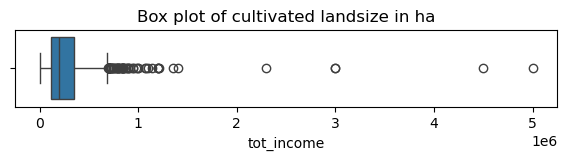

In [15]:
# Check for outlier
# Create a boxplot to visualize distribution of `crp_landsize_ha`

plt.figure(figsize=(7,1))
sns.boxplot(hdds_df["tot_income"], orient="h");
plt.title("Box plot of cultivated landsize in ha");

Outliers records using IQR:
90


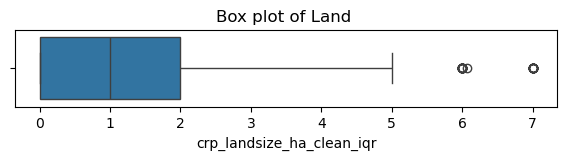

In [16]:
hdds_df_no_outlier = outlier_infor_iqr(hdds_df, "crp_landsize_ha")
plt.figure(figsize=(7,1))
sns.boxplot(hdds_df_no_outlier["crp_landsize_ha_clean_iqr"], orient="h");
plt.title("Box plot of Land ");

In [17]:
hdds_df_no_outlier.head()

,state,hh_agricactivity,hh_gender,hh_education,hh_size,tot_income,hh_age,crp_landsize_ha,shock_climate,shock_drought,shock_flood,shock_plantdisease,shock_pestoutbreak,shock_animaldisease,shock_violenceinsecconf,shock_higherfoodprices,shock_higherfuelprices,hdds_cereals,hdds_rootstubers,hdds_vegetables,hdds_fruits,hdds_meat,hdds_eggs,hdds_fish,hdds_legumes,hdds_milkdairy,hdds_oils,hdds_sugar,hdds_condiments,hdds_score,hdds_class,fcs_staple_days,fcs_pulses_days,fcs_vegetables_days,fcs_fruit_days,fcs_meat_fish_days,fcs_dairy_days,fcs_sugar_days,fcs_oil_days,fcs_condiments_days,fcg,FI_0_6,fies_cat,weight_final,crp_landsize_ha_clean_iqr
0,Yobe,crop production,Male,Secondary Education,7.0,200000.0,41 to 65,2.428167,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,Medium,4.0,3.0,7.0,4.0,7.0,3.0,2.0,7.0,7.0,3.0,0,Secure,0.640673,2.428167
1,Zamfara,crop and livestock production,Male,Primary Education,6.0,613000.0,41 to 65,0.809389,True,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,High,7.0,7.0,7.0,4.0,7.0,3.0,3.0,7.0,7.0,3.0,0,mild to moderate,0.802971,0.809389
2,Adamawa,crop and livestock production,Male,Higher Education,10.0,700000.0,41 to 65,5.000000,True,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,10.0,High,4.0,3.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,0,mild to moderate,0.845520,5.000000
3,Zamfara,crop and livestock production,Male,Higher Education,6.0,261900.0,41 to 65,0.809389,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,High,5.0,5.0,3.0,1.0,2.0,3.0,2.0,4.0,6.0,3.0,0,Secure,0.802971,0.809389
4,Borno,livetock production,Male,Secondary Education,12.0,230000.0,41 to 65,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0,High,7.0,4.0,7.0,3.0,7.0,3.0,7.0,5.0,7.0,3.0,0,mild to moderate,1.286373,0.000000


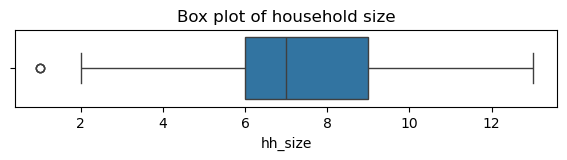

In [18]:
# Create a boxplot to visualize distribution of `hh_size`

plt.figure(figsize=(7,1))
sns.boxplot(hdds_df_no_outlier["hh_size"], orient="h");
plt.title("Box plot of household size");

<Axes: xlabel='tot_income'>

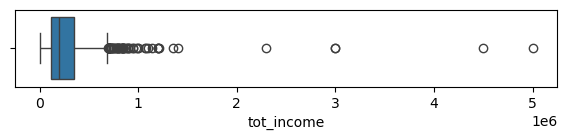

In [19]:
# Income
plt.figure(figsize=(7,1))
sns.boxplot(hdds_df_no_outlier["tot_income"], orient="h")

Outliers records using IQR:
66


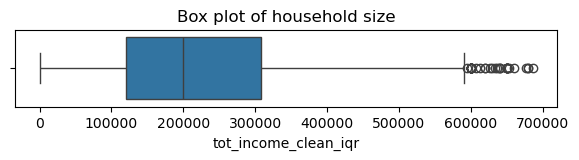

In [20]:
hdds_df_no_outlier = outlier_infor_iqr(hdds_df, "tot_income")
plt.figure(figsize=(7,1))
sns.boxplot(hdds_df_no_outlier["tot_income_clean_iqr"], orient="h");
plt.title("Box plot of household size");

In [21]:
# Convert Naira to dollar (460.51 )
hdds_df_no_outlier.loc[:, "tot_income_dollar"] = hdds_df_no_outlier["tot_income_clean_iqr"].div(460.51) 

### Data Preparation

In [22]:
# df.info()

In [23]:
hdds_df_no_outlier.shape

(1414, 46)

Outliers records using IQR:
40


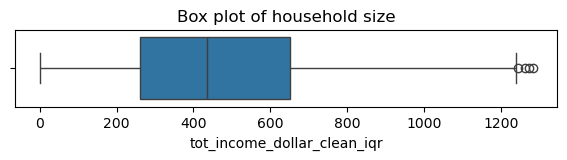

In [24]:
hdds_df_no_outlier = outlier_infor_iqr(hdds_df_no_outlier, "tot_income_dollar")
plt.figure(figsize=(7,1))
sns.boxplot(hdds_df_no_outlier["tot_income_dollar_clean_iqr"], orient="h");
plt.title("Box plot of household size");


In [28]:
hdds_df_no_outlier.groupby(by="state")["tot_income_dollar_clean_iqr"].agg(["mean", "std"])

,mean,std
state,,
Adamawa,459.376319,257.083006
Borno,439.993508,279.243610
Katsina,459.111706,288.171436
Yobe,474.552708,310.418029
Zamfara,510.459185,303.204977


 Check the balance of the dependent variable

In [23]:
hdds_df_no_outlier["hdds_class"].value_counts(normalize=True)

hdds_class
High      0.730552
Medium    0.208628
Low       0.060820
Name: proportion, dtype: float64

Quick inspection of the some of the new variables

In [29]:
hdds_df_no_outlier.head()

,state,hh_agricactivity,hh_gender,hh_education,hh_size,tot_income,hh_age,crp_landsize_ha,shock_climate,shock_drought,shock_flood,shock_plantdisease,shock_pestoutbreak,shock_animaldisease,shock_violenceinsecconf,shock_higherfoodprices,shock_higherfuelprices,hdds_cereals,hdds_rootstubers,hdds_vegetables,hdds_fruits,hdds_meat,hdds_eggs,hdds_fish,hdds_legumes,hdds_milkdairy,hdds_oils,hdds_sugar,hdds_condiments,hdds_score,hdds_class,fcs_staple_days,fcs_pulses_days,fcs_vegetables_days,fcs_fruit_days,fcs_meat_fish_days,fcs_dairy_days,fcs_sugar_days,fcs_oil_days,fcs_condiments_days,fcg,FI_0_6,fies_cat,weight_final,tot_income_clean_iqr,tot_income_dollar
0,Yobe,crop production,Male,Secondary Education,7.0,200000.0,41 to 65,2.428167,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,Medium,4.0,3.0,7.0,4.0,7.0,3.0,2.0,7.0,7.0,3.0,0,Secure,0.640673,200000.0,434.301101
1,Zamfara,crop and livestock production,Male,Primary Education,6.0,613000.0,41 to 65,0.809389,True,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,High,7.0,7.0,7.0,4.0,7.0,3.0,3.0,7.0,7.0,3.0,0,mild to moderate,0.802971,613000.0,1331.132874
2,Adamawa,crop and livestock production,Male,Higher Education,10.0,700000.0,41 to 65,5.000000,True,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,10.0,High,4.0,3.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,0,mild to moderate,0.845520,200000.0,434.301101
3,Zamfara,crop and livestock production,Male,Higher Education,6.0,261900.0,41 to 65,0.809389,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,High,5.0,5.0,3.0,1.0,2.0,3.0,2.0,4.0,6.0,3.0,0,Secure,0.802971,261900.0,568.717292
4,Borno,livetock production,Male,Secondary Education,12.0,230000.0,41 to 65,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0,High,7.0,4.0,7.0,3.0,7.0,3.0,7.0,5.0,7.0,3.0,0,mild to moderate,1.286373,230000.0,499.446266


In [28]:
hdds_df_no_outlier["crp_landsize_ha"].agg(["min", "max"])

min         0.0
max    300000.0
Name: crp_landsize_ha, dtype: float64

## Model Building

In [63]:

hdds_df_no_outlier.to_csv("../../data/DIEM_NG/hdds_round4_data.csv", index=False)

In [64]:
hdds_df_no_outlier.shape

(1414, 46)

In [65]:
hdds_df_no_outlier.state.value_counts()

state
Borno      290
Zamfara    286
Adamawa    283
Katsina    282
Yobe       273
Name: count, dtype: int64